# DOT Model

In [53]:
# Importing Python Packages

In [54]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
# Downloading data

df = pd.read_csv('dot.csv', index_col = 'Date')
df.index = pd.to_datetime (df.index)
df.columns

Index(['Price', 'Volume', 'CirSupply', 'Velocity', 'Valuation'], dtype='object')

# Correlation Matrix

In [56]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov() 
cov_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,0.004667,-0.004728,-0.000009,-0.004875,-0.004769
Volume,-0.004728,0.113256,-0.000005,0.112779,0.223195
CirSupply,-0.000009,-0.000005,0.000026,-0.000029,-0.000057
Velocity,-0.004875,0.112779,-0.000029,0.117636,0.221930
Valuation,-0.004769,0.223195,-0.000057,0.221930,0.453625


In [57]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr() 
corr_matrix

,Price,Volume,CirSupply,Velocity,Valuation
Price,1.000000,-0.205633,-0.026757,-0.208075,-0.103637
Volume,-0.205633,1.000000,-0.002672,0.977072,0.984704
CirSupply,-0.026757,-0.002672,1.000000,-0.016308,-0.016545
Velocity,-0.208075,0.977072,-0.016308,1.000000,0.960725
Valuation,-0.103637,0.984704,-0.016545,0.960725,1.000000


In [58]:
import statsmodels.api as sm

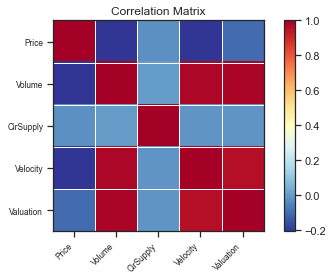

In [59]:
sm.graphics.plot_corr(corr_matrix, xnames=list(corr_matrix.columns))
plt.show()

In [60]:
val = df ['Valuation']

In [61]:
val.describe()

count    717.000000
mean       0.222385
std        0.429467
min        0.010000
25%        0.040000
50%        0.090000
75%        0.210000
max        5.390000
Name: Valuation, dtype: float64

# Chart Visualisation

In [62]:
import numpy as np
import pandas as pd
from pandas_datareader import data 
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Download the data
data = pd.read_csv('dot.csv',
                   parse_dates=['Date'],
                   index_col=['Date'])
data.head()

,Price,Volume,CirSupply,Velocity,Valuation
Date,,,,,
2020-09-02,6.14,95139255,852573444,0.11,0.08
2020-09-03,5.75,132811036,852331522,0.16,0.14
2020-09-04,5.15,164230639,851991728,0.19,0.19
2020-09-05,4.12,195582618,853126305,0.23,0.22
2020-09-06,4.80,192533434,852553193,0.23,0.24


In [64]:
price = df ['Price']

In [65]:
price.describe()

count    717.000000
mean      20.346778
std       12.594825
min        3.760000
25%        8.510000
50%       18.630000
75%       29.840000
max       53.880000
Name: Price, dtype: float64

In [66]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

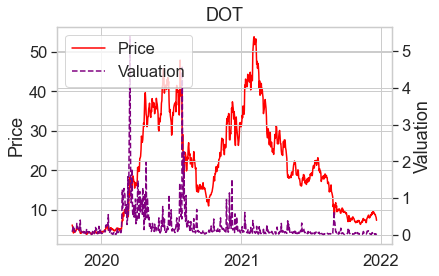

In [67]:
# Create figure and plot space
plt.rc('font', size=8)
fig, ax = plt.subplots(figsize=(6, 4))
axb = ax.twinx()

# Add x-axis and y-axis
ax.plot(data.index.values, price, color='red', label='Price')

# Set title and labels for axes
ax.set(xlabel="",
       ylabel="Price",
       title="DOT")

# Plotting on the second y-axis
axb.set_ylabel('Valuation')
axb.plot(data.index.values, val, color='purple', linestyle='--', label='Valuation')

# Handling of getting lines and labels from all axes for a single legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axb.get_legend_handles_labels()
axb.legend(lines + lines2, labels + labels2, loc='upper left');

# Define the date format
date_form = DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=47))

plt.show()

# Linear Regression

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Velocity vs Valuation'}, xlabel='Velocity', ylabel='Valuation'>

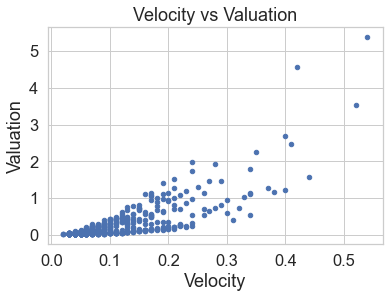

In [69]:
df.plot (kind='scatter', x='Velocity', y='Valuation', title='Velocity vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Circulation supply vs Valuation'}, xlabel='CirSupply', ylabel='Valuation'>

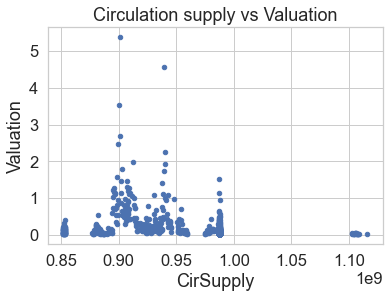

In [70]:
df.plot (kind='scatter', x='CirSupply', y='Valuation', title='Circulation supply vs Valuation')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Volume vs Valuation'}, xlabel='Volume', ylabel='Valuation'>

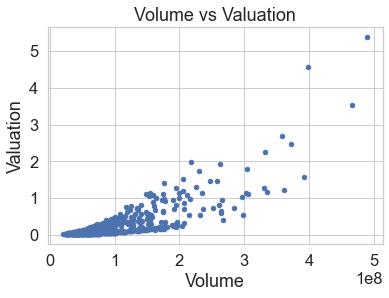

In [71]:
df.plot (kind='scatter', x='Volume', y='Valuation', title='Volume vs Valuation')

In [72]:
import sklearn.linear_model as lm

In [73]:
lr =lm.LinearRegression()

In [74]:
df.columns = df.columns.str.strip()

In [75]:
x = df.Volume       #Independent variable
y = df.Valuation        #Dependent variable

In [76]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1,1) #reshape to column

In [77]:
lr.fit (x,y)

LinearRegression()

Text(0.5, 0, 'Volume')

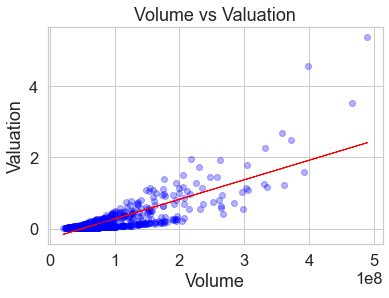

In [78]:
plt.scatter (x,y, color ='blue', alpha=0.3)
plt.plot (x, lr.predict (x), color = 'red', linewidth=1)
plt.title ('Volume vs Valuation')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

In [79]:
lr.predict (x)

array([ 2.50299978e-01,  4.56676901e-01,  6.28802583e-01,  8.00557801e-01,
        7.83853489e-01,  5.35178199e-01,  3.95526825e-01,  3.50317964e-01,
        4.86942813e-01,  4.75410087e-01,  5.32453166e-01,  8.65561158e-01,
        7.61536717e-01,  6.93562545e-01,  5.83583916e-01,  5.25555035e-01,
        4.42214469e-01,  4.01682467e-01,  6.65814241e-01,  1.19810716e+00,
        6.13399759e-01,  4.86357934e-01,  2.76395032e-01,  2.56095082e-01,
        1.44373053e-01,  1.31216119e-01,  4.05802141e-01,  3.48713532e-01,
        2.05706526e-01,  2.90995013e-01,  4.66961765e-01,  2.16310347e-01,
        1.05297767e-01,  1.65608476e-01,  6.94022650e-01,  6.21895380e-01,
        5.49804969e-01,  3.61168927e-01,  3.63341354e-01,  2.28188429e-01,
        3.49983224e-01,  2.71334177e-01,  4.07623080e-01,  3.31207822e-01,
        3.50199639e-01,  1.39896038e-02,  1.82260762e-03,  7.23284732e-02,
        4.33423655e-01,  3.35176268e-01,  2.00346967e-01,  3.21597401e-01,
        1.18996186e-01,  

In [80]:
R_Sq = r2_score (y, lr.predict (x))
R_Sq

0.645434902299382

In [81]:
# Model Statistics

In [82]:
import statsmodels.formula.api as smf
model1=smf.ols(formula='Valuation~Volume',data=df).fit()
model1.params

Intercept   -2.709004e-01
Volume       5.478290e-09
dtype: float64

In [83]:
model1.pvalues

Intercept     1.032313e-50
Volume       3.852039e-163
dtype: float64

In [84]:
model1.rsquared

0.6454349022993822

In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          3.85e-163
Time:                        00:51:45   Log-Likelihood:                -39.147
No. Observations:                 717   AIC:                             82.29
Df Residuals:                     715   BIC:                             91.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2709      0.017    -16.239      0.000      -0.304      -0.238
Volume      5.478e-09   1.52e-10     36.077      0.000    5.18e-09    5.78e-09
==============================================================================
Omnibus:                      664.865   Durbin-Watson:                   0.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54490.737
Skew:                           3.794   Prob(JB):                         0.00
Kurtosis:                      45.028   Cond. No.                     1.92e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
val_pred=model1.predict(pd.DataFrame(df['Volume']))
val_pred

Date
2020-09-02    0.250300
2020-09-03    0.456677
2020-09-04    0.628803
2020-09-05    0.800558
2020-09-06    0.783853
                ...   
2022-08-15    0.049982
2022-08-16   -0.031482
2022-08-17    0.034896
2022-08-18   -0.034684
2022-08-19    0.124694
Length: 717, dtype: float64

In [87]:
df['val_pred']=-1.301119e-01*df['Volume']+3.395391e-08
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/693)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(14539347.42868071, 0.2223849372384946, 65379191.63602401)

# Multiple Linear Regression

In [88]:
import statsmodels.formula.api as smf
model2=smf.ols(formula='Valuation~Volume+Velocity',data=df).fit()
model2.params

Intercept   -3.443344e-01
Volume       2.163193e-08
Velocity    -1.433273e+01
dtype: float64

In [89]:
val_pred=model2.predict(df[['Volume','Velocity']])
val_pred

Date
2020-09-02    0.137111
2020-09-03    0.235388
2020-09-04    0.485073
2020-09-05    0.589968
2020-09-06    0.524008
                ...   
2022-08-15    0.206085
2022-08-16    0.027739
2022-08-17    0.146515
2022-08-18    0.015097
2022-08-19    0.357772
Length: 717, dtype: float64

In [90]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     780.7
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.02e-180
Time:                        00:51:59   Log-Likelihood:                 4.6375
No. Observations:                 717   AIC:                            -3.275
Df Residuals:                     714   BIC:                             10.45
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3443      0.017    -19.724      0.000      -0.379      -0.310
Volume      2.163e-08   1.68e-09     12.850      0.000    1.83e-08    2.49e-08
Velocity     -14.3327      1.488     -9.631      0.000     -17.255     -11.411
==============================================================================
Omnibus:                      654.761   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49883.128
Skew:                           3.724   Prob(JB):                         0.00
Kurtosis:                      43.178   Cond. No.                     1.82e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
import numpy as np
df['val_pred']=-3.726460e-01 + 2.499669e-08*df['Volume'] + 3.684614e+00*df['Velocity']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(2.5615019671047214, 0.2223849372384946, 11.518324932041882)

In [92]:
import statsmodels.formula.api as smf
model3=smf.ols(formula='Valuation~Volume+Velocity+CirSupply',data=df).fit()
model3.params

Intercept   -1.030294e+00
Volume       1.735093e-08
Velocity    -1.028107e+01
CirSupply    7.141173e-10
dtype: float64

In [93]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Valuation   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     526.3
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          2.92e-180
Time:                        00:52:06   Log-Likelihood:                 7.7395
No. Observations:                 717   AIC:                            -7.479
Df Residuals:                     713   BIC:                             10.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0303      0.276     -3.731      0.000      -1.572      -0.488
Volume      1.735e-08    2.4e-09      7.223      0.000    1.26e-08    2.21e-08
Velocity     -10.2811      2.202     -4.669      0.000     -14.604      -5.958
CirSupply   7.141e-10   2.87e-10      2.489      0.013    1.51e-10    1.28e-09
==============================================================================
Omnibus:                      644.632   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47909.983
Skew:                           3.636   Prob(JB):                         0.00
Kurtosis:                      42.380   Cond. No.                     2.37e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
val_pred=model3.predict(df[['Volume','Velocity','CirSupply']])
val_pred

Date
2020-09-02    0.098380
2020-09-03    0.237795
2020-09-04    0.474279
2020-09-05    0.607833
2020-09-06    0.554518
                ...   
2022-08-15    0.263062
2022-08-16    0.108106
2022-08-17    0.215526
2022-08-18    0.098676
2022-08-19    0.402758
Length: 717, dtype: float64

In [95]:
import numpy as np
df['val_pred']=-0.3919 + 2.436e-08*df['Volume'] + 3.7717*df['Velocity'] + 1.105e-10*df['CirSupply']
df['RSE']=(df['Valuation']-df['val_pred'])**2
RSEd=df.sum()['RSE']
RSE=np.sqrt(RSEd/692)
valmean=np.mean(df['Valuation'])
error=RSE/valmean
RSE,valmean,error

(2.5700150111767206, 0.2223849372384946, 11.556605600587654)

In [96]:
model4=smf.ols(formula='Volume~Velocity+CirSupply',data=df).fit()
rsquared=model4.rsquared 
VIF=1/(1-rsquared)
VIF

284.45237002606694

# Polynomial Regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [98]:
x=df.Volume
y=df.Valuation

In [99]:
degree=2
model5=make_pipeline (PolynomialFeatures (degree), lr)

In [100]:
x = df.iloc[:, 1].values
y = df.iloc[:, 4].values

x = x.reshape (-1, 1) #reshape to column

In [101]:
model5.fit (x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Text(0.5, 8.959999999999994, 'Volume')

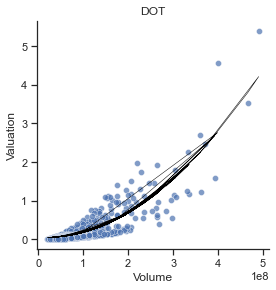

In [103]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="Volume", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.plot (x, model5.predict (x), color='black', linewidth=.5)
plt.title ('DOT')
plt.ylabel ('Valuation')
plt.xlabel ('Volume')

Text(0.5, 8.959999999999994, 'Circulation Supply')

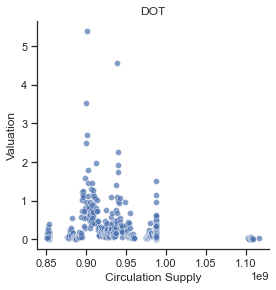

In [104]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.relplot(x="CirSupply", y="Valuation", alpha=.7, palette="muted",
            height=4, data=df)
plt.title ('DOT')
plt.ylabel ('Valuation')
plt.xlabel ('Circulation Supply')